<a href="https://colab.research.google.com/github/heehoonhong/AI_Practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cnn은 합성곱 연산과 풀링(pooling)을 통해 공간적 패턴과 중요한 특징을 자동으로 학습

# 합성곱 계층, 풀링 계층, 완전 연결 계층으로 구성되어 있음

In [5]:
import numpy as np

In [6]:
def conv2d(input,kernel,stride=1,padding=0):
  #입력에 패딩 추가
  input_padded=np.pad(input,((padding,padding),(padding,padding)),mode='constant')

  #출력 크기 계산
  output_height=(input.shape[0]-kernel.shape[0]+2*padding)//stride+1
  output_width=(input.shape[1]-kernel.shape[1]+2*padding)//stride+1
  output=np.zeros((output_height,output_width))

  #합성곱 연산
  for i in range(0,output_height):
    for j in range(0,output_width):
      region=input_padded[i*stride:i*stride+kernel.shape[0],j*stride:j*stride+kernel.shape[1]]
      output[i,j]=np.sum(region*kernel)
  return output

#테스트
input_image=np.random.rand(5,5) # 5x5 입력 이미지
kernel=np.array([[1,0,-1],[1,0,-1],[1,0,-1]]) # 간단한 엣지 필터
output=conv2d(input_image,kernel,stride=1,padding=1)
print(output)

[[-0.784764    0.3958237  -0.71597112  0.08463873  1.50073512]
 [-1.7531722   0.43752148 -0.63595604  0.14083004  2.38912824]
 [-2.16907627  0.24276323  0.02953273  0.16022205  2.13954354]
 [-1.76311255  0.27894732  0.12049321  0.14855434  1.64261934]
 [-0.79470435  0.23724955  0.04047813  0.09236303  0.75422621]]


In [7]:
import torch
import torch.nn as nn

# 입력 이미지( 1 x 3 x 32 x 32 크기의 텐서: Batch, Channel, Height, Width)
x=torch.rand(1,3,32,32) # 예: RGB 이미지

# 합성곱 계층 정의(3채널 입력, 16개 필터, 커널 크기 3 x 3)
conv=nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)

# 합성곱 연산 실행
out=conv(x)
print(out.shape) # 출럭 텐서 크기: [1, 16, 32, 32]

torch.Size([1, 16, 32, 32])


Linear Layer와의 비교

In [8]:
import torch
import torch.nn as nn

# 1. Linear Lyaer 정의(입력 차원: 4, 출력 차원: 2)
linear=nn.Linear(in_features=4,out_features=2,bias=True)

# 2. 랜덤 입력 텐서 생성(배치 크기: 3, 입력 차원: 4)
x=torch.rand(3,4) # 예: 배치 크기 3인 입력 데이터

# 3. 순전파 실행(Linear Lyaer 통과)
output=linear(x)

print("입력: ",x.shape)
print("출력: ",output.shape)
print("가중치: ",linear.weight)
print("편향: ",linear.bias)



입력:  torch.Size([3, 4])
출력:  torch.Size([3, 2])
가중치:  Parameter containing:
tensor([[-0.4596,  0.3786, -0.2540,  0.2250],
        [-0.4837, -0.3340, -0.2186,  0.4734]], requires_grad=True)
편향:  Parameter containing:
tensor([-0.3504,  0.3602], requires_grad=True)


In [7]:
# Pooling Lyaer는 CNN에서 특징 맵(feature map)의 크기를 줄이고, 중요한 정보만 남기기 위해 사용되는 계층이다.
# 이 과정은 연산량을 줄이고, 모델이 과적합되지 않도록 돕습니다.

In [9]:
def max_pool2d(input,size=2,stride=2):
  output_height=(input.shape[0]-size)//stride+1
  output_width=(input.shape[1]-size)//stride+1
  output=np.zeros((output_height,output_width))

  for i in range(output_height):
    for j in range(output_width):
      region=input[i*stride:i*stride+size,j*stride:j*stride+size]
      output[i,j]=np.max(region)
  return output

# 테스트
input_image=np.random.rand(4,4) # 4 x 4 입력 이미지
output=max_pool2d(input_image,size=2,stride=2)
print(input_image)
print("======================")
print(output)

[[0.44644633 0.21674695 0.48649908 0.92846502]
 [0.28810645 0.18702138 0.96392878 0.53206147]
 [0.75913546 0.32586434 0.82042485 0.49389504]
 [0.95618674 0.42218473 0.83185972 0.95255454]]
[[0.44644633 0.96392878]
 [0.95618674 0.95255454]]


In [10]:
def min_pool2d(input,size=2,stride=2):
  output_height=(input.shape[0]-size)//stride+1
  output_width=(input.shape[1]-size)//stride+1
  output=np.zeros((output_height,output_width))

  for i in range(output_height):
    for j in range(output_width):
      region=input[i*stride:i*stride+size,j*stride:j*stride+size]
      output[i,j]=np.min(region)
  return output

# 테스트
input_image=np.random.rand(4,4) # 4 x 4 입력 이미지
output=min_pool2d(input_image,size=2,stride=2)
print(input_image)
print("======================")
print(output)

[[0.07338165 0.09667332 0.7868813  0.25923336]
 [0.75839494 0.43999021 0.34887283 0.94262524]
 [0.43484634 0.03593175 0.35553317 0.41521635]
 [0.57142519 0.97973076 0.78202506 0.64993094]]
[[0.07338165 0.25923336]
 [0.03593175 0.35553317]]


In [11]:
def avg_pool2d(input,size=2,stride=2):
  output_height=(input.shape[0]-size)//stride+1
  output_width=(input.shape[1]-size)//stride+1
  output=np.zeros((output_height,output_width))

  for i in range(output_height):
    for j in range(output_width):
      region=input[i*stride:i*stride+size,j*stride:j*stride+size]
      output[i,j]=np.mean(region)
  return output

# 테스트
input_image=np.random.rand(4,4) # 4 x 4 입력 이미지
output=avg_pool2d(input_image,size=2,stride=2)
print(input_image)
print("======================")
print(output)

[[0.41414445 0.93495348 0.41918754 0.60864559]
 [0.12980694 0.11773106 0.73813193 0.27060868]
 [0.4995836  0.7255902  0.67647628 0.35526897]
 [0.69684195 0.2404517  0.83662732 0.90181552]]
[[0.39915899 0.50914344]
 [0.54061686 0.69254702]]


In [12]:
x=torch.rand(1,3,32,32)

conv=nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)
pool=nn.MaxPool2d(kernel_size=2,stride=2)

out=conv(x)
out_pool=pool(out)

print(out.shape)
print(out_pool.shape) # 출력 텐서 크기: [1, 16, 16, 16]

torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])


In [13]:
# FC layer
# 완전 연결 계층은 신경망에서 모든 입력 뉴런이 모든 출력 뉴런과 연결된 계층
# 주로 CNN의 마지막 단계에서 사용되어, 최종 분류 또는 예측을 수행한다.

In [13]:
def fully_connected(x,weights,bias):
  return np.dot(x,weights)+bias

#테스트
input_vector=np.array([1,2,3]) # 입력 벡터
weigths=np.array([[0.1,0.2],[0.3,0.4],[0.5,0.6]]) # 가중치 행렬 (3x2)
bias=np.array([0.1,0.2]) # 편향 벡터(2차원)
output=fully_connected(input_vector,weigths,bias)
print(input_vector.shape)
print(output.shape)

(3,)
(2,)


In [14]:
x=torch.rand(1,3,32,32)
conv=nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)
pool=nn.MaxPool2d(kernel_size=2,stride=2)

out=conv(x)
out_pool=pool(out)

print(out.shape)
print(out_pool.shape)

# 특징 맵을 Flatten ( 16 x 16x 16 -> 4096 )하여 완전 연결 계층에 전달
out_flat = out_pool.view(out_pool.size(0), -1) # Flatten
print(out_flat.shape)

# 완전 연결 계층 정의
fc=nn.Linear(4096,10)
out_fc=fc(out_flat)
print(out_fc.shape)
print(out_fc)

torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])
torch.Size([1, 4096])
torch.Size([1, 10])
tensor([[ 0.4223,  0.2079,  0.2658,  0.0329,  0.1111, -0.1814, -0.4393, -0.0249,
         -0.0292,  0.1118]], grad_fn=<AddmmBackward0>)


In [15]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(16,32,3,padding=1)
    self.fc1=nn.Linear(32*8*8,128) # CIFAR-10 크기
    self.fc2=nn.Linear(128,10) # 10개의 클래스

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=x.view(-1,32*8*8)
    x=torch.relu(self.fc1(x))
    x=self.fc2(x)
    return x

model=SimpleCNN()

inputs=torch.rand(4,3,32,32)

outputs=model(inputs)
print(outputs.shape) # [4,10]


torch.Size([4, 10])


In [16]:
class SimpleCNN_detail(nn.Module):
    def __init__(self):
        super(SimpleCNN_detail, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # CIFAR-10 크기 (32x32 입력 → 8x8 출력)
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스

    def forward(self, x):
        print('input shape : ', x.shape)
        x = self.conv1(x)
        print('conv output shape : ', x.shape)
        x = torch.relu(x)
        print('relu output shape : ', x.shape)
        x = self.pool(x)
        print('pooling output shape : ', x.shape)

        x = self.conv2(x)
        print('conv output shape : ', x.shape)
        x = torch.relu(x)
        print('relu output shape : ', x.shape)
        x = self.pool(x)
        print('pooling output shape : ', x.shape)
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        print('flatten output shape', x.shape)
        x = self.fc1(x)
        print('fc output shape', x.shape)
        x = torch.relu(x)
        x = self.fc2(x)
        print('fc output shape', x.shape)
        return x

# 모델 초기화
model = SimpleCNN_detail()

# 입력 예시 (Batch size: 4, 3채널, 32x32 이미지)
inputs = torch.rand(4, 3, 32, 32)

# 모델 실행 (순전파)
outputs = model(inputs)
print(outputs.shape)  # [4, 10]



input shape :  torch.Size([4, 3, 32, 32])
conv output shape :  torch.Size([4, 16, 32, 32])
relu output shape :  torch.Size([4, 16, 32, 32])
pooling output shape :  torch.Size([4, 16, 16, 16])
conv output shape :  torch.Size([4, 32, 16, 16])
relu output shape :  torch.Size([4, 32, 16, 16])
pooling output shape :  torch.Size([4, 32, 8, 8])
flatten output shape torch.Size([4, 2048])
fc output shape torch.Size([4, 128])
fc output shape torch.Size([4, 10])
torch.Size([4, 10])


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [18]:
# CIFAR-10 데이터셋 전처리(이미지를 텐서로 변환하고 정규화)
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

# 훈련 및 데이터셋 로드
trainset=torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True)

testset=torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=32,shuffle=False)

# 클래스 이름 정의
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100%|██████████| 170M/170M [00:11<00:00, 14.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [20]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(16,32,3,padding=1)
    self.fc1=nn.Linear(32*8*8,64)
    self.fc2=nn.Linear(64,10)

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=x.view(-1,32*8*8)
    x=torch.relu(self.fc1(x))
    x=self.fc2(x)
    return x
model=SimpleCNN().cuda()

In [21]:
criterion=nn.CrossEntropyLoss().cuda()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [22]:
for epoch in range(5):
  running_loss=0.0
  for i, data in enumerate(trainloader,0):

    inputs,labels=data
    inputs=inputs.cuda()
    labels=labels.cuda()

    # 옵티마이저 초기화
    optimizer.zero_grad()

    # 순전파+ 손실 계산+ 역전파+최적화
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    # 통계 출력t
    running_loss+=loss.item()
    if i%100==99:
      print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.3f}')
      running_loss=0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.302
Epoch 1, Batch 200, Loss: 2.294
Epoch 1, Batch 300, Loss: 2.285
Epoch 1, Batch 400, Loss: 2.270
Epoch 1, Batch 500, Loss: 2.234
Epoch 1, Batch 600, Loss: 2.173
Epoch 1, Batch 700, Loss: 2.097
Epoch 1, Batch 800, Loss: 1.987
Epoch 1, Batch 900, Loss: 1.941
Epoch 1, Batch 1000, Loss: 1.882
Epoch 1, Batch 1100, Loss: 1.862
Epoch 1, Batch 1200, Loss: 1.830
Epoch 1, Batch 1300, Loss: 1.787
Epoch 1, Batch 1400, Loss: 1.759
Epoch 1, Batch 1500, Loss: 1.747
Epoch 2, Batch 100, Loss: 1.688
Epoch 2, Batch 200, Loss: 1.673
Epoch 2, Batch 300, Loss: 1.624
Epoch 2, Batch 400, Loss: 1.628
Epoch 2, Batch 500, Loss: 1.601
Epoch 2, Batch 600, Loss: 1.592
Epoch 2, Batch 700, Loss: 1.571
Epoch 2, Batch 800, Loss: 1.549
Epoch 2, Batch 900, Loss: 1.523
Epoch 2, Batch 1000, Loss: 1.488
Epoch 2, Batch 1100, Loss: 1.497
Epoch 2, Batch 1200, Loss: 1.499
Epoch 2, Batch 1300, Loss: 1.487
Epoch 2, Batch 1400, Loss: 1.452
Epoch 2, Batch 1500, Loss: 1.464
Epoch 3, Batch 100, Loss: 1.

In [23]:
correct=0
total=0

# 평가 모드 전환(Gradient 비활성화)
model.eval()
with torch.no_grad():
  for data in testloader:
    images, labels=data
    images=images.cuda()
    labels=labels.cuda()
    outputs=model(images)

    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f'Accuracy of teh test dataset: {100*correct/total:.2f}%')

Accuracy of teh test dataset: 58.51%


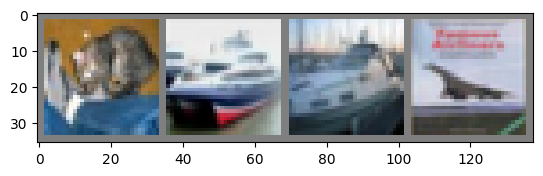

GroundTruth:  cat ship ship plane
Predicted:  cat car ship ship


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 출력 함수 정의
def imshow(img):
  img=img/2+0.5 # 정규화 해제
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(testloader)
images,labels=next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4])) # 4개 이미지 출력
print('GroundTruth: ',' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
outputs=model(images.cuda())
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join(f'{classes[predicted[j]]}' for j in range(4)))

In [26]:
# 더 깊은 CNN 모델 구현해보기

In [27]:
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()

        # 첫 번째 합성곱 블록
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # 두 번째 합성곱 블록
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        # 세 번째 합성곱 블록
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        # 완전 연결 계층
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        # 드롭아웃 (과적합 방지)
        # self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 첫 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool1(x)

        # 두 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool2(x)

        # 세 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv5(x))
        x = torch.relu(self.conv6(x))
        x = self.pool3(x)

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully Connected Layers
        x = torch.relu(self.fc1(x))
        # x = self.dropout(x)  # Dropout 적용
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = DeeperCNN().cuda()

In [28]:
# 손실 함수 및 옵티마이저 정의

In [29]:
criterion=nn.CrossEntropyLoss().cuda()
optimizer=optim.Adam(model.parameters(),lr=0.001) # Adam 옵티마이저

In [30]:
# 모델 학습

In [31]:
for epoch in range(10):
  running_loss=0.0
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    inputs=inputs.cuda()
    labels=labels.cuda()

    optimizer.zero_grad() # 옵티마이저 초기화
    outputs=model(inputs) # 순전파
    loss=criterion(outputs,labels) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 최적화

    running_loss+=loss.item()
    if i%100==99:
      print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.3f}')
      running_loss=0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.189
Epoch 1, Batch 200, Loss: 1.962
Epoch 1, Batch 300, Loss: 1.831
Epoch 1, Batch 400, Loss: 1.762
Epoch 1, Batch 500, Loss: 1.649
Epoch 1, Batch 600, Loss: 1.621
Epoch 1, Batch 700, Loss: 1.496
Epoch 1, Batch 800, Loss: 1.534
Epoch 1, Batch 900, Loss: 1.421
Epoch 1, Batch 1000, Loss: 1.385
Epoch 1, Batch 1100, Loss: 1.349
Epoch 1, Batch 1200, Loss: 1.288
Epoch 1, Batch 1300, Loss: 1.280
Epoch 1, Batch 1400, Loss: 1.244
Epoch 1, Batch 1500, Loss: 1.226
Epoch 2, Batch 100, Loss: 1.127
Epoch 2, Batch 200, Loss: 1.084
Epoch 2, Batch 300, Loss: 1.073
Epoch 2, Batch 400, Loss: 1.063
Epoch 2, Batch 500, Loss: 1.052
Epoch 2, Batch 600, Loss: 1.016
Epoch 2, Batch 700, Loss: 1.010
Epoch 2, Batch 800, Loss: 1.014
Epoch 2, Batch 900, Loss: 0.990
Epoch 2, Batch 1000, Loss: 0.994
Epoch 2, Batch 1100, Loss: 0.954
Epoch 2, Batch 1200, Loss: 0.990
Epoch 2, Batch 1300, Loss: 0.944
Epoch 2, Batch 1400, Loss: 0.898
Epoch 2, Batch 1500, Loss: 0.905
Epoch 3, Batch 100, Loss: 0.

In [32]:
correct=0
total=0
model.eval() # 평가 모드 전환

with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.cuda()
    labels=labels.cuda()
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f'Accuracy of the test dataset: {100*correct/total:.2f}%')


Accuracy of the test dataset: 75.92%


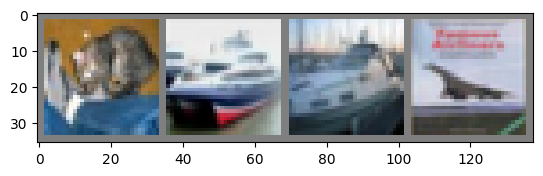

GroundTruth:  cat ship ship plane
Predicted:  cat ship plane plane


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img=img/2+0.5 # 정규화 해제
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter=iter(testloader)
images,labels=next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4])) # 4개 이미지 출력
print('GroundTruth: ',' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
images=images.cuda()
outputs=model(images[:4])
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join(f'{classes[predicted[j]]}' for j in range(4)))

In [34]:
# 필터 개수와 뉴런 수를 증가한 CNN 코드

In [36]:
import torch
import torch.nn as nn

class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN,self).__init__()

        # 첫 번째 합성곱 블록: 필터 수 증가(3채널 입력, 32채널 출력)
        self.conv1=nn.Conv2d(3,32,3,padding=1)

        # 두 번째 합성곱 블록: 더 많은 필터(32채널 입력, 64채널 출력)
        self.conv2=nn.Conv2d(32,64,3,padding=1)

        # 세 번째 합성곱 블록: 더 많은 필터(64채널 입력, 128채널 출력)
        self.conv3=nn.Conv2d(64,128,3,padding=1)

        # Max Pooling Lyaer
        self.pool=nn.MaxPool2d(2,2)

        # Fully Connected Layer: 더 많은 뉴런 사용(Flatten 후)
        self.fc1=nn.Linear(128*4*4,256) # 뉴런 수 256개로 증가
        self.fc2=nn.Linear(256,128) # 중간 계층 추가(뉴런 수 128)
        self.fc3=nn.Linear(128,10) # 최종 출력(10개 클래스)

        # 드롭아웃 추가(과적합 방지)
        #self.dropout=nn.Dropout(0.5)

    def forward(self,x):
        # 첫 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv1(x)))

        # 두 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv2(x)))

        # 세 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv3(x)))

        # Flatten
        x = x.view(-1,128*4*4)

        # Fully Connected Layers
        x = torch.relu(self.fc1(x))
        #x = self.dropout(x) # Dropout 적용
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x

# 모델 초기화
model=EnhancedCNN().cuda()

# 모델 구조 출력
print(model)

EnhancedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [37]:
# 손실 함수 및 옵티마이저 정의

In [38]:
import torch.optim as optim

# 손실 함수: CrossEntropyLoss
criterion=nn.CrossEntropyLoss()

# 옵티마이저: Adam(학습률 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [39]:
# 모델 학습

In [41]:
from subprocess import run
for epoch in range(10):
  running_loss=0.0
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    inputs=inputs.cuda()
    labels=labels.cuda()

    optimizer.zero_grad() # 옵티마이저 초기화
    outputs=model(inputs) # 순전파
    loss=criterion(outputs,labels) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 최적화

    running_loss+=loss.item()
    if i%100==99:
      print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.3f}')
      running_loss=0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.061
Epoch 1, Batch 200, Loss: 1.771
Epoch 1, Batch 300, Loss: 1.623
Epoch 1, Batch 400, Loss: 1.526
Epoch 1, Batch 500, Loss: 1.481
Epoch 1, Batch 600, Loss: 1.394
Epoch 1, Batch 700, Loss: 1.360
Epoch 1, Batch 800, Loss: 1.334
Epoch 1, Batch 900, Loss: 1.266
Epoch 1, Batch 1000, Loss: 1.237
Epoch 1, Batch 1100, Loss: 1.186
Epoch 1, Batch 1200, Loss: 1.164
Epoch 1, Batch 1300, Loss: 1.156
Epoch 1, Batch 1400, Loss: 1.108
Epoch 1, Batch 1500, Loss: 1.147
Epoch 2, Batch 100, Loss: 1.015
Epoch 2, Batch 200, Loss: 1.013
Epoch 2, Batch 300, Loss: 1.001
Epoch 2, Batch 400, Loss: 0.978
Epoch 2, Batch 500, Loss: 0.965
Epoch 2, Batch 600, Loss: 0.945
Epoch 2, Batch 700, Loss: 0.969
Epoch 2, Batch 800, Loss: 0.917
Epoch 2, Batch 900, Loss: 0.874
Epoch 2, Batch 1000, Loss: 0.918
Epoch 2, Batch 1100, Loss: 0.886
Epoch 2, Batch 1200, Loss: 0.884
Epoch 2, Batch 1300, Loss: 0.857
Epoch 2, Batch 1400, Loss: 0.860
Epoch 2, Batch 1500, Loss: 0.814
Epoch 3, Batch 100, Loss: 0.

In [42]:
correct=0.0
total=0
model.eval() # 평가 모드 전환

with torch.no_grad(): # Gradient 계산 비활성화
  for data in testloader:
    images,labels=data
    images=images.cuda()
    labels=labels.cuda()
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f'Accuracy of the test dataset: {100*correct/total:.2f}%')

Accuracy of the test dataset: 74.80%


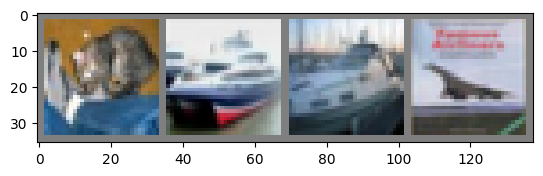

GroundTruth:  cat ship ship plane
Predicted:  cat ship ship plane


In [43]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img=img/2+0.5 # 정규화 해제
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter=iter(testloader)
images, labels=next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4])) # 4개 이미지 출력
print('GroundTruth: ',' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
images=images.cuda()
outputs=model(images[:4])
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join(f'{classes[predicted[j]]}' for j in range(4)))